# Milestone 2



# Introduction

**Nama      : Titian Fitriana Prasasti**

***Batch    : 001 HCK***

**Dataset   :** Dataset diambil dari UC Irvine Machine Learning Repository berjudul `UC Irvine Machine Learning Repository`

### Assignment Objectives

Milestones 2 ini dibuat guna mengevaluasi Pembelajaran Phase 1:

- Mampu memahami konsep supervised learning dan unsupervised learning
- Mampu mempersiapkan data untuk digunakan dalam model supervised learning dan unsupervised learning
- Mampu mengimplementasikan supervised learning dan unsupervised learning dengan dataset yang baru
- Mampu melakukan evaluasi model
- Mampu melakukan model tuning
- Mampu melakukan model deployment

### Problems

Membuat model-model Classification untuk memprediksi target antara lain:
1. Logistic Regression
2. SVM
3. Decision Tree
4. Random Forest
5. KNN
6. Naive Bayes
7. AdaBoost

### Data Dictionary
1. date : Date in MM-DD-YYYY
2. day : Day of the Week
3. quarter : A portion of the month. A month was divided into four quarters
4. department : Associated department with the instance
5. team_no : Associated team number with the instance
6. no_of_workers : Number of workers in each team
7. no_of_style_change : Number of changes in the style of a particular product
8. targeted_productivity : Targeted productivity set by the Authority for each team for each day.
9. smv : Standard Minute Value, it is the allocated time for a task
10. wip : Work in progress. Includes the number of unfinished items for products
11. over_time : Represents the amount of overtime by each team in minutes
12. incentive : Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.
13. idle_time : The amount of time when the production was interrupted due to several reasons
14. idle_men : The number of workers who were idle due to production interruption
15. actual_productivity : The actual % of productivity that was delivered by the workers. It ranges from 0-1.

# Import Libraries

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import phik
 

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler 
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTENC
from collections import Counter
import scipy.stats as stats

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, ConfusionMatrixDisplay, confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pickle


# Data Loading

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
data = pd.read_csv('garments_worker_productivity.csv')
data

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


In [5]:
data.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [6]:
data.tail()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.9,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.9,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.9,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.9,NaN,1800,0,0.0,0,0,15.0,0.505889
1196,3/11/2015,Quarter2,finishing,Wednesday,6,0.70,2.9,NaN,720,0,0.0,0,0,6.0,0.394722


### Cek Missing Value

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

Terdapat missing value pada kolom `wip` sejumlah 506 data

In [8]:
data.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


Terlihat banyak nilai 0 pada kolom numerik dataset ini, penjelasannya sebagai berikut:

- Kolom `incentive` : incentive diberikan pada situasi-situasi tertentu saja dengan tujuan memotivasi karyawan untuk mengerjakan suatu task dengan dalam kondisi tertentu.
- Kolom `idle_time` : idle time merupakan waktu di mana terhentinya proses produksi karena terdapat issue tertentu. Sehingga wajar jika banyak nilai 0 karena lini produksi sejatinya tidak boleh berhenti selama jam kerja berlangsung.
- Kolom `idle_man` : kolom ini erat kaitannya dengan idle time karena terjadinya karyawan yang menganggur saat jam kerja pasti disebabkan oleh adanya idle time atau terhambatnya proses produksi.
- Kolom `wip` : work in progress sendiri dalam deskripsi data tidak terlihat memiliki nilai 0 karena terdeteksi sebagai missing value, namun penulis meyakini missing value tersebut sebenarnya 0 karena sama seperti kolom lain yang memiliki nilai 0, kolom work in progress juga hanya terjadi di waktu tertentu ketika workload hari tersebut tidak bisa diselesaikan.

Berdasarkan uraian di atas dapat kita ketahui bahwa ke empat kolom tersebut merupakan kumpulan kejadian yang bersifat insidental sehingga wajar jika terdapat banyak nilai 0 dan nilai 0 ini bukanlah missing value. Selanjutnya kita akan analisis lebih lanjut di tahap exploratory data analysis (EDA).


In [9]:
# Menganti NaN dengan 0
data['wip'].fillna(0, inplace=True)

In [10]:
data.department.value_counts()

sweing        691
finishing     257
finishing     249
Name: department, dtype: int64

Terdapat whitespace pada kolom `department` dan terdapat kesalahan pengejaan pada label sewing

In [11]:
# Menghapus whitespace pada kolom `department`
data['department'] = [string.strip() for string in data.department]

# Memperbaiki ejaan label 'sewing'
data.loc[data.department=='sweing', 'department'] = 'sewing'

In [12]:
data.department.value_counts()

sewing       691
finishing    506
Name: department, dtype: int64

### Checking Duplicate

In [13]:
data.duplicated().sum()

0

Tidak terdapat data duplikat dalam dataset

# Exploratory Data Analysis (EDA)

Sehubungan dengan objectives dari pembuatan model adalah klasifikasi penulis menemukan bahwa kolom target yaitu kolom `actual_productivity` memiliki value dalam bentuk range 0-1 sehingga perlu di konversi menjadi target klasifikasi yaitu 0 dan 1 dimana 0 adalah prduktif dan 1 adalah tidak produktif. Penentuannya didasari apakah nilai kolom `actual_productivity` >= dari nilai kolom `targeted_productivity`. Penulis bisa saja mengambil treshold 0.5 tetapi jika ditinjau kembali dari kolom `targeted_productivity`, terdapat nilai target yang di bawah 0.5 sehingga threshold 0.5 menjadi tidak valid dalam menggambarkan populasi data. Penulis akan membuat kolom baru untuk dijadikan target dengan bantuan function sebagai berikut:

In [14]:
# Function untuk mengubah value kolom 'actual_productivity'
def enc_target(data):
  lis_kosong = []

  for i in range(len(data)):
    if data.loc[i, 'actual_productivity'] >= data.loc[i, 'targeted_productivity']:
      lis_kosong.append('0')
    else:
      lis_kosong.append('1')

  return lis_kosong

In [15]:
# Konversi value range menjadi binary
target = enc_target(data = data)

In [16]:
# Membuat kolom `target`
data['target'] = target

In [17]:
data['target'] = data['target'].astype('int64')
data['department'] = data['department'].astype('str')
data['day'] = data['day'].astype('str')

[Text(0, 0, '875'), Text(0, 0, '322')]

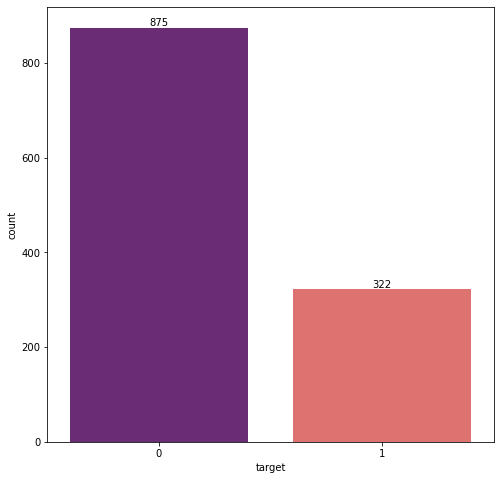

In [18]:
# Melihat jumlah data target

plt.figure(figsize=(8,8))
cp = sns.countplot(data=data, x='target', palette='magma')
cp.bar_label(cp.containers[0], label_type='edge')

Dari visualisasi tersebut terlihat bahwa data target imbalance dengan proporsi label 0 (produktif) sebanyak **73%** dan label 1 (tidak produktif) **27%**. Data imbalance akan di handling lebih lanjut dengan metode SMOTENC pada bagian data preprocessing.

### Numeric Data Distribution

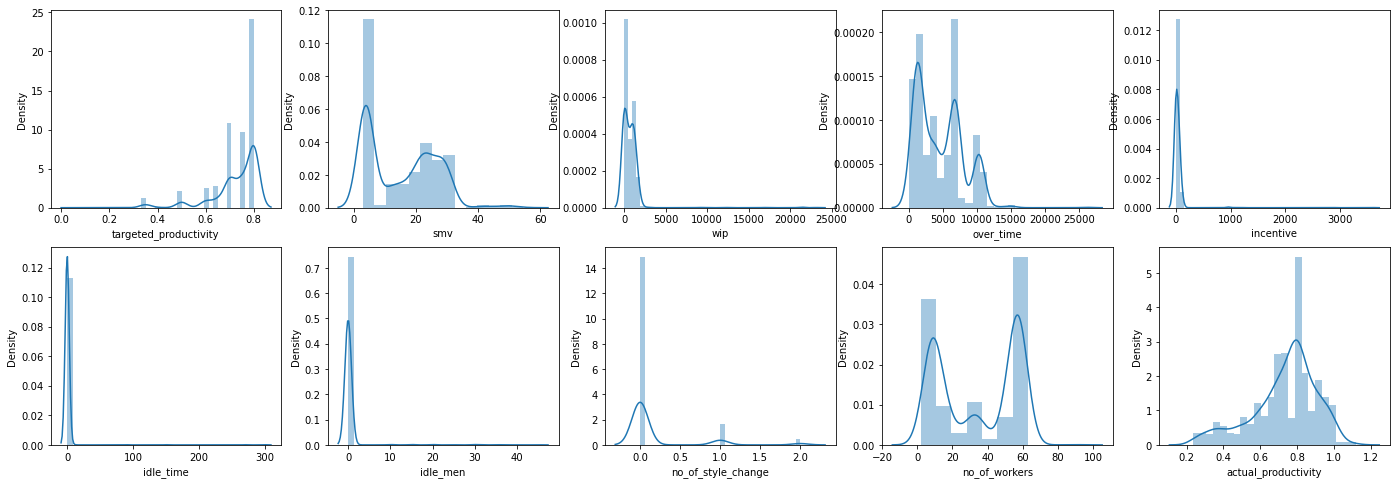

In [19]:
import warnings
warnings.filterwarnings("ignore")

cols_dis = ['targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men','no_of_style_change', 'no_of_workers', 'actual_productivity']
fig, ax = plt.subplots(ncols=5,nrows=2,figsize=(24,8))
x=0
for i in range(2):
  for j in range(5):
    try:
      sns.distplot(data[cols_dis[x]],ax=ax[i][j])
      x+=1
    except:
      pass
plt.show()

In [20]:
data[cols_dis].skew()

targeted_productivity    -2.144150
smv                       0.405937
wip                      10.852386
over_time                 0.673287
incentive                15.790746
idle_time                20.545425
idle_men                  9.855079
no_of_style_change        2.942506
no_of_workers            -0.111740
actual_productivity      -0.807492
dtype: float64

Dari grafik dan perhitungan skew terlihat bahwa 7 dari 3 kolom numerik memiliki distribusi yang skew sehingga dapat dipertimbangkan untuk menggunakan min max scaller dalam tahap feature scalling, namun kita harus meninjau kembali korelasi dari kolom-kolom tersebut terhadap kolom target terkait feature selection.

<AxesSubplot:xlabel='no_of_style_change', ylabel='count'>

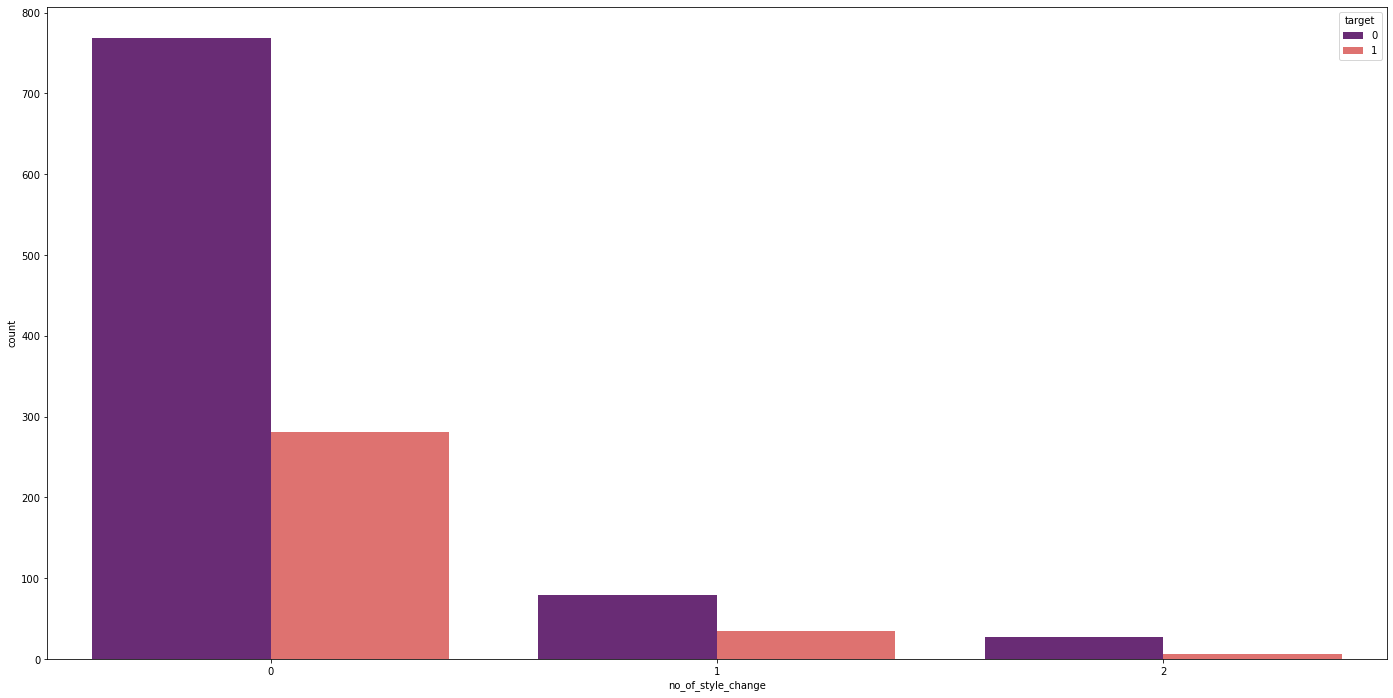

In [21]:
fig, ax = plt.subplots(figsize=(24,12))
sns.countplot(data=data, x='no_of_style_change', hue='target', palette='magma')

Kolom `no_of_style_change` merupakan keterangan terkait berapa kali adanya pergantian pembuatan jenis produk dalam satu hari. Terlihat bahwa proporsi jauh lebih banyak pada label 0 yang artinya tidak terjadi pergantian pembuatan jenis produk. Secara proporsi label target terlihat tidak begitu ada pola jika diliat secara proporsi. Sehingga penulis kurang mempertimbangkan kolom ini untuk menjadi feature tapi perlu dilakukan uji korelasi terlebih dahulu untuk menguji asumsi.

<AxesSubplot:xlabel='smv', ylabel='target'>

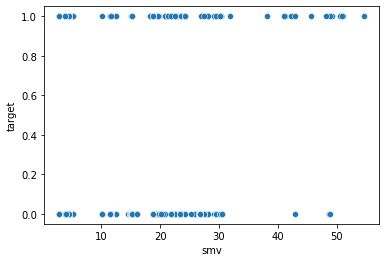

In [22]:
sns.scatterplot(data['smv'],data['target'],palette='magma')

<AxesSubplot:xlabel='smv', ylabel='count'>

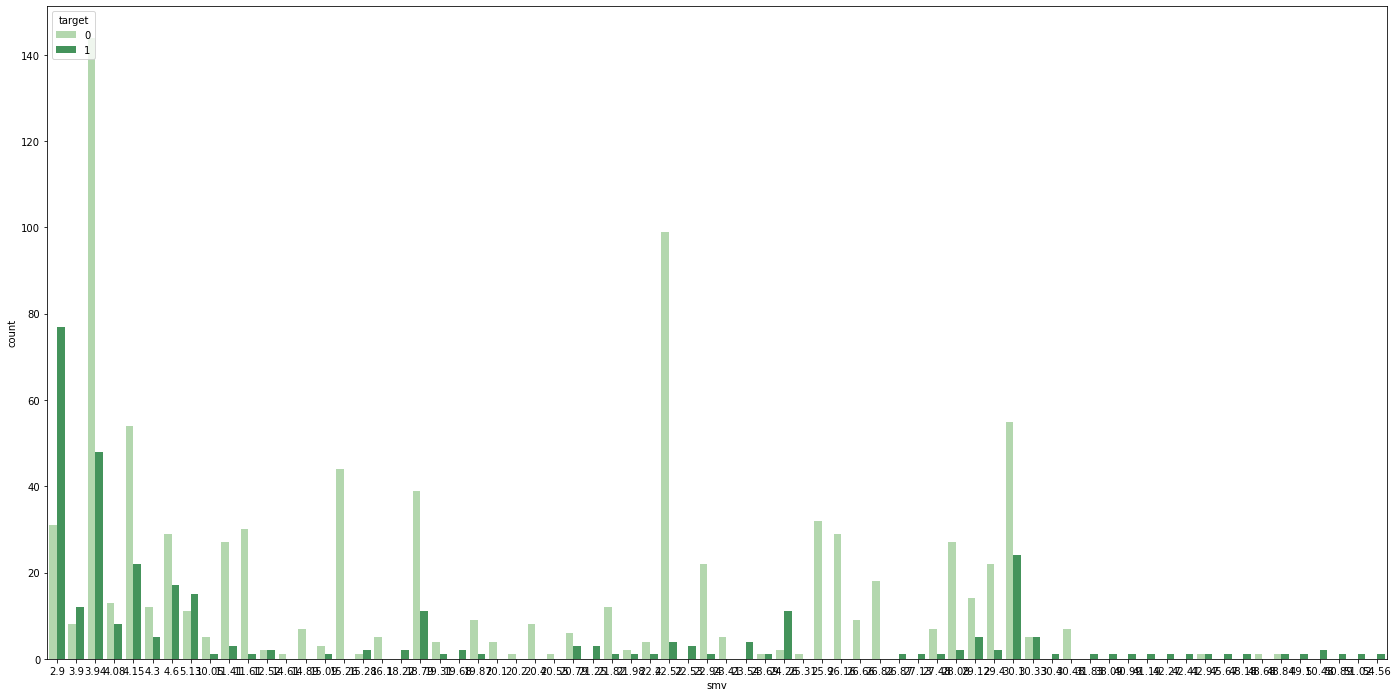

In [84]:
# Melihat deskripsi target dari kolom `smv`

fig, ax = plt.subplots(figsize=(24,12))
sns.countplot(data=data, x='smv', hue='target', palette='Greens')

Sekilas tentang SMV atau Standard Minute Value merupakan sebuah pengukuran yang umum di industri garment terkait lama waktu (dalam menit) yang paling optimal untuk menyelesaikan satu produk dengan mesin yg digunakan. Setiap produk seperti t-shirt, kemeja, celana dll. memiliki SMV yang berbeda-beda. SMV dihitung oleh industrial engineer dengan menyesuaikan kapasitas mesin dan kapasitas labor yang dibutuhkan.

source : https://ordnur.com/apparel/standard-minute-value-smv-garments-calculation-importance/

Pada kolom `smv` terlihat adanya pola yang cukup menarik di mana pada titik data terendah, label 1 (tidak produktif) terlihat memiliki proporsi yang sangat tinggi. Pada sebaran ditengah cenderung naik dan turun bahkan ada yang tidak terlihat label 1 sama sekali, namun pada titik data dengan nilai yang tinggi walaupun proporsinya kecil labelnya di dominasi oleh label 1.

### Category Data Proportion

<AxesSubplot:xlabel='team', ylabel='count'>

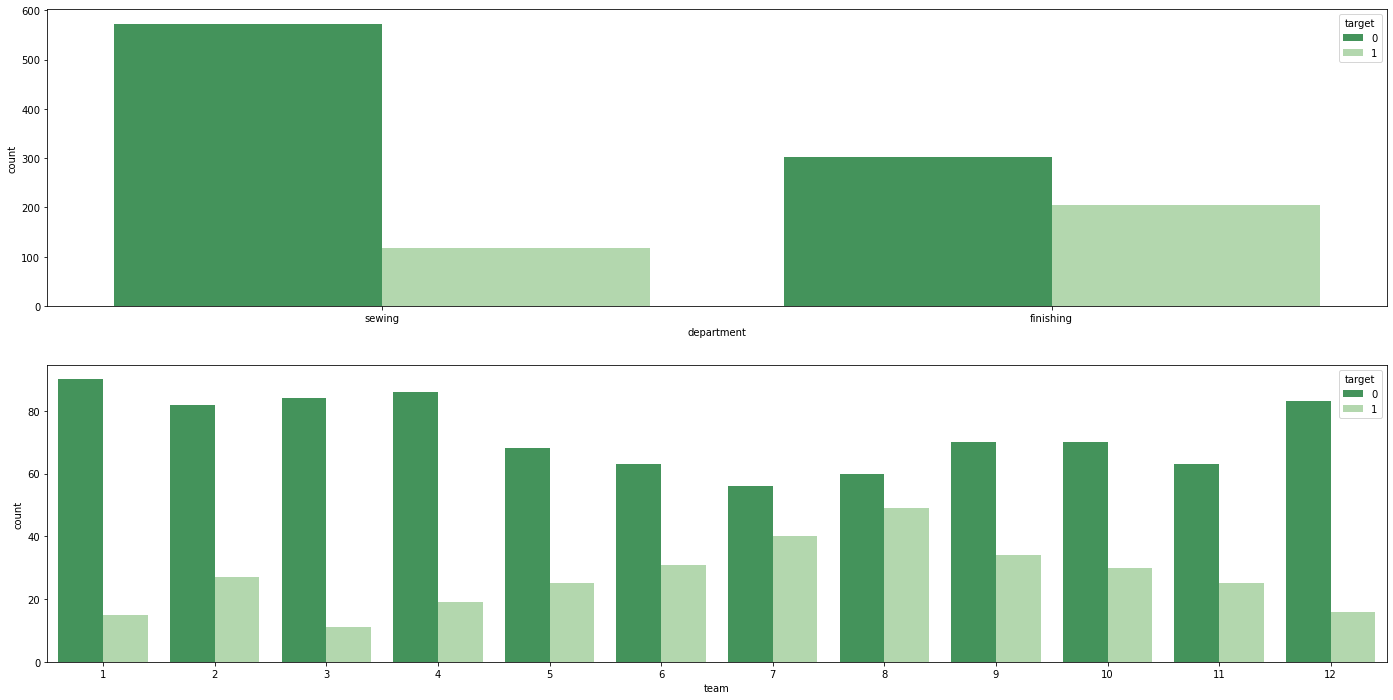

In [82]:
# Melihat deskripsi target dari kolom `department` dan `team`

fig, ax = plt.subplots(nrows=2, figsize=(24,12))
sns.countplot(data=data, x='department', hue='target', ax=ax[0], palette='Greens_r')
sns.countplot(data=data, x='team', hue='target', ax=ax[1], palette='Greens_r')

- Kolom `department` : pada visualisasi tersebut terlihat bahwa departemen finishing memiliki proporsi label 1 (tidak produktif) yang lebih tinggi dari pada department sewing. Padahal jika ditinjau dari tingkat kesulitannya, sewing merupakan pekerjaan yang lebih sulit daripada finishing. 

- Kolom `team` : secara umum keseluruhan team memiliki proporsi label 0 (produktif) yang hampir sama. Sedangkan untuk label 1 (tidak produktif) terlihat lebih beragam, tetapi yang perlu kita soroti adalah team 7 dan 8 yang memiliki proporsi label 0 (produktif) yang cenderung lebih rendah dari yang lain dan proporsi label 1 (tidak produktif) yang lebih banyak dari team lainnya. 

Dari uraian tersebut kita bisa melihat adanya pola yang mengindikasikan adanya hubungan dari kedua kolom tersebut dengan kolom target. Selanjutnya untuk menguji asumsi ini kita perlu melakukan uji hipotesis terlebih dahulu yang akan dillakukan di tahap feature selection.

<AxesSubplot:xlabel='team', ylabel='count'>

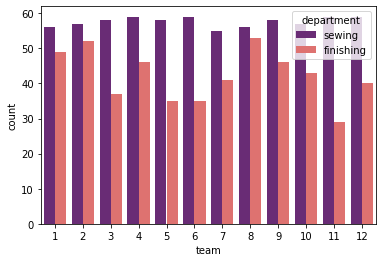

In [25]:
sns.countplot(data=data, x='team', hue='department', palette='magma')

Dari visualisasi ini kita tahu bahwa setiap team terdiri dari kedua department tersebut. Dari grafik ini pula kita bisa melihat bahwa team 6 dan 7 memiliki jumlah karyawan finishing yang cenderung lebih rendah dari yang lain. Hal ini mengkonfirmasi bahwa terdapat hal yang janggal dari kedua team tersebut. Bisa jadi kedua team tersebut tidak produktif karena memang kekurangan orang. Man power adalah faktor krusial dalam efisiensi kerja apalagi yang berbasis team. Sehingga bisa menjadi pertimbangan lebih lanjut untuk mengevaluasi berapakah jumlah masing-masing department dalam satu team yang paling optimal untuk memaksimalkan produktivitas lini produksi.

<AxesSubplot:xlabel='quarter', ylabel='count'>

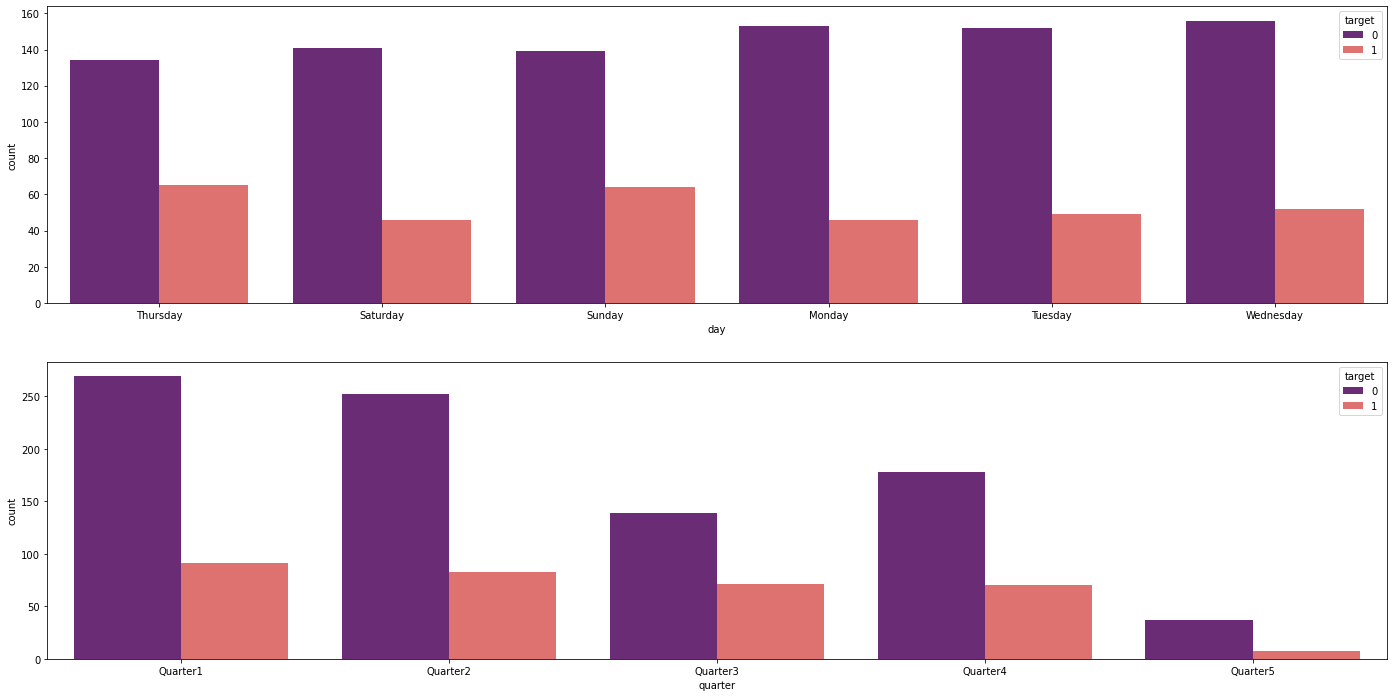

In [26]:
# Melihat deskripsi target dari kolom `day`, `quarter`, dan `no_of_style_change`

fig, ax = plt.subplots(nrows=2, figsize=(24,12))
sns.countplot(data=data, x='day', hue='target', ax=ax[0], palette='magma')
sns.countplot(data=data, x='quarter', hue='target', ax=ax[1], palette='magma')

In [27]:
data.groupby(['day','target'])['day'].count()

day        target
Monday     0         153
           1          46
Saturday   0         141
           1          46
Sunday     0         139
           1          64
Thursday   0         134
           1          65
Tuesday    0         152
           1          49
Wednesday  0         156
           1          52
Name: day, dtype: int64

Jika dilihat dari data di atas hari libur ada di hari jumat mengingat hari jumat merupakan hari libur mingguan di Bangladesh. Menariknya hari kamis adalah hari yang memiliki proporsi label 1 (tidak produktif) yang paling tinggi. Hal ini bisa saja terjadi karena hari selanjutnya yaitu jumat adalah hari libur, asumsinya produktivitas karyawan menurun sebelum hari libur. Sebaliknya produktivitas meningkat sesudah hari libur seperti yang tampak pada hari sabtu. 

# Data Preprocessing

### Data Inference

In [28]:
data_inf = data.sample(5, random_state=50)
data_inf

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,target
679,2/9/2015,Quarter2,finishing,Monday,6,0.75,2.90,0.0,960,0,0.0,0,0,8.0,0.888125,0
1023,3/2/2015,Quarter1,finishing,Monday,1,0.65,3.94,0.0,3360,0,0.0,0,0,8.0,0.537919,1
453,1/26/2015,Quarter4,finishing,Monday,7,0.65,3.94,0.0,1440,0,0.0,0,0,8.0,0.646307,1
284,1/17/2015,Quarter3,sewing,Saturday,12,0.80,11.61,1039.0,5670,63,0.0,0,0,31.5,0.800247,0
739,2/12/2015,Quarter2,finishing,Thursday,9,0.80,3.94,0.0,960,0,0.0,0,0,8.0,0.656667,1


### Split Train & Test

In [29]:
# mendefinisikan feature dan target

X = data.drop(columns='target', axis=1)
y = data['target']
X

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,0.0,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,0.0,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,0.0,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,0.0,1800,0,0.0,0,0,15.0,0.505889


In [30]:
# memisahkan data train dengan test

train, test = train_test_split(data, test_size=0.2, stratify=y, random_state=50)

print('Train size: ', train.shape)
print('Test size: ', test.shape)

Train size:  (957, 16)
Test size:  (240, 16)


## Feature Selection

In [31]:
# Korelasi data numerik
data.corr().nlargest(16, 'target')['target']

target                   1.000000
idle_men                 0.148807
team                     0.089525
idle_time                0.058113
targeted_productivity    0.000161
no_of_style_change      -0.006260
incentive               -0.069441
wip                     -0.151204
smv                     -0.156531
over_time               -0.190724
no_of_workers           -0.246983
actual_productivity     -0.659135
Name: target, dtype: float64

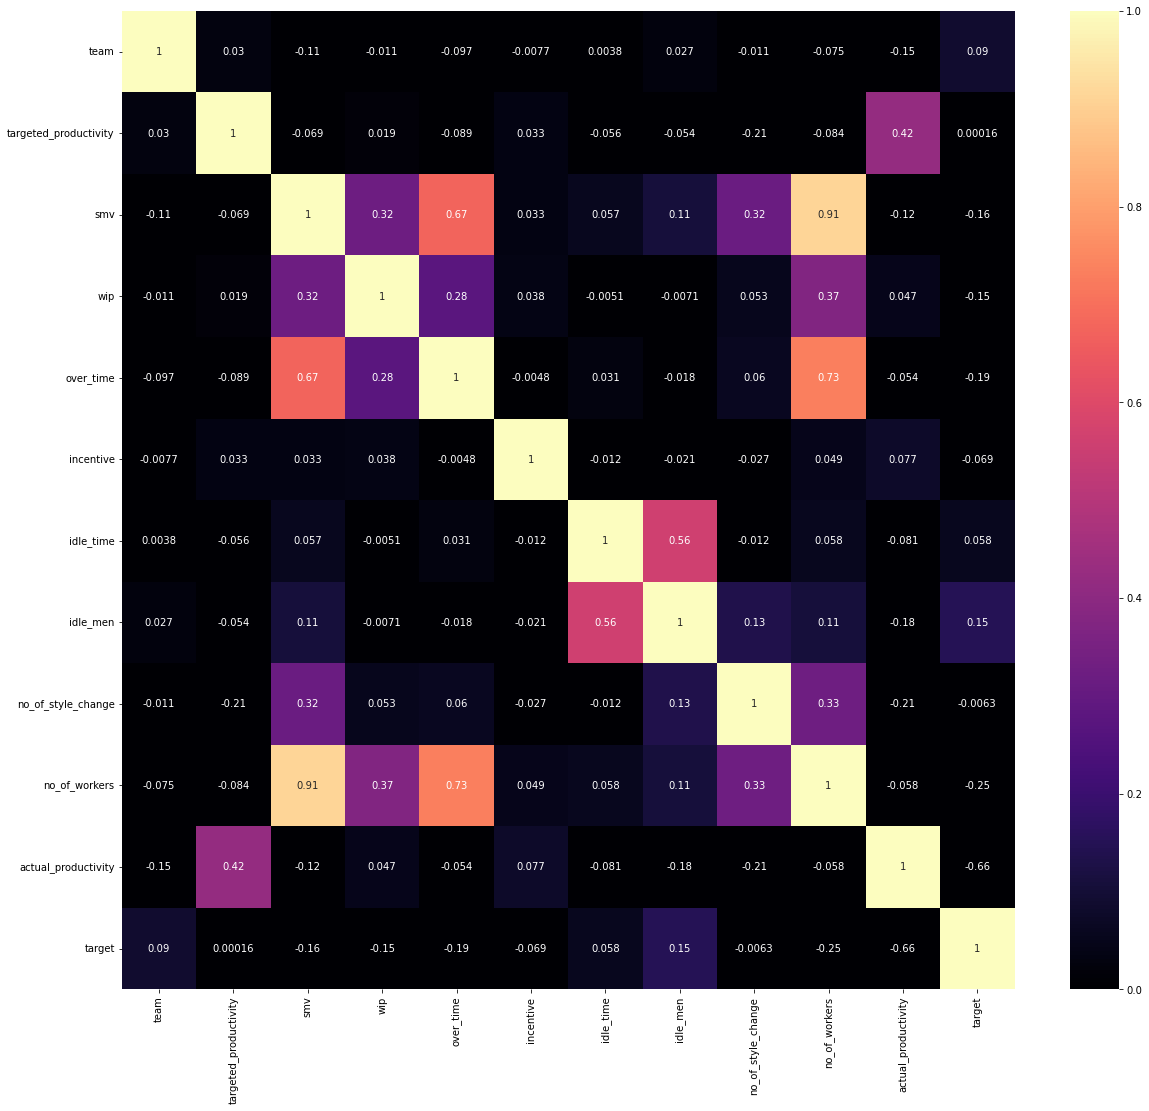

In [32]:
# Visualisasi korelasi 
corr = data.corr()
plt.figure(figsize=(20,18))
sns.heatmap(corr, vmin=0, vmax=1, annot=True, cmap='magma')
plt.show()

Semua asumsi kita terkait kolom numeric tenyata terbukti signifikan secara statistik dengan kolom numerik yang memiliki korelasi sebagai berikut:

1. `smv`
2. `wip`
3. `over_time`
4. `idle_men`
5. `no_of_workers`
6. `actual_productivity`

## Categorical Data Correlation (Hyphotesis Testing)

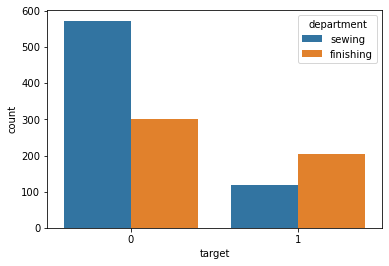

target        0    1
department          
finishing   302  204
sewing      573  118
p=0.000000000000
Probably dependent


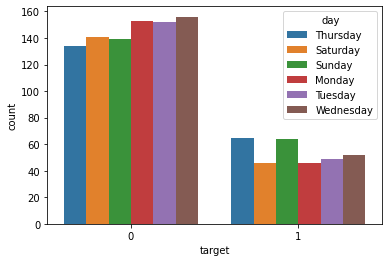

target       0   1
day               
Monday     153  46
Saturday   141  46
Sunday     139  64
Thursday   134  65
Tuesday    152  49
Wednesday  156  52
p=0.128117110042
Probably independent


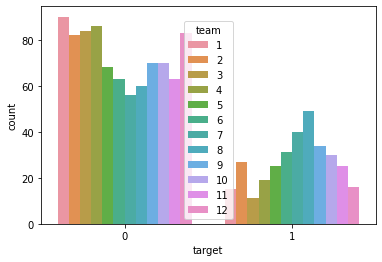

target   0   1
team          
1       90  15
2       82  27
3       84  11
4       86  19
5       68  25
6       63  31
7       56  40
8       60  49
9       70  34
10      70  30
11      63  25
12      83  16
p=0.000000002696
Probably dependent


In [33]:
for cat in ['department', 'day', 'team']:
    sns.countplot(x='target',data=data, hue=cat)
    plt.show()
    #creating a contingency table
    ct=pd.crosstab(data[cat],data['target'])
    # checking the dependency
    stat, p, dof, expected = stats.chi2_contingency(ct)
    print(ct)
    print('p=%.12f' %(p))
    if p > 0.05:
        print('Probably independent')
    else:
        print('Probably dependent')

Dari ketiga kolom kategori yang kita uji, 2 kolom diantaranya memiliki hubungan yang signifikan yaitu kolom `team` dan `department`

In [34]:
# Memisahkan kolom numerik dan kategori
num_cols = ['smv','wip','over_time','idle_men','no_of_workers', 'actual_productivity']
cat_cols = ['department']
cat_rest = ['team']

num_data = train[num_cols]
cat_data = train[cat_cols]
cat_rest_data = train[cat_rest]

### Preprocess Data Numerik

### Handling Outlier

In [35]:
num_data.skew()

smv                     0.398843
wip                    10.757182
over_time               0.766553
idle_men                8.781161
no_of_workers          -0.065086
actual_productivity    -0.823609
dtype: float64

Karena 8 dari 10 kolom numerik distribusinya skew, penulis memilih untuk melakukan winsorizing dengan metode iqr

In [36]:
winsor = Winsorizer(capping_method="iqr", tail="both", fold=3, variables=num_cols)
winsor.fit(train)
train_clean = winsor.transform(train).reset_index()

In [37]:
train_clean

,index,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,target
0,450,1/26/2015,Quarter4,sewing,Monday,5,0.75,20.40,1118.0,10320.0,56,0.0,0.0,0,58.0,0.750031,0
1,698,2/10/2015,Quarter2,finishing,Tuesday,1,0.80,3.94,0.0,1440.0,0,0.0,0.0,0,12.0,0.853667,0
2,959,2/26/2015,Quarter4,finishing,Thursday,10,0.70,2.90,0.0,3360.0,0,0.0,0.0,0,8.0,0.410833,1
3,629,2/5/2015,Quarter1,finishing,Thursday,10,0.80,3.94,0.0,960.0,0,0.0,0.0,0,8.0,0.771583,1
4,271,1/15/2015,Quarter3,finishing,Thursday,7,0.80,2.90,0.0,1440.0,0,0.0,0.0,0,8.0,0.689299,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
952,1011,3/2/2015,Quarter1,sewing,Monday,11,0.80,11.61,632.0,0.0,50,0.0,0.0,0,57.0,0.800309,0
953,255,1/14/2015,Quarter2,sewing,Wednesday,11,0.35,14.61,838.0,7200.0,23,0.0,0.0,0,55.0,0.350031,0
954,478,1/28/2015,Quarter4,sewing,Wednesday,3,0.80,22.52,1350.0,6840.0,113,0.0,0.0,0,57.0,1.000230,0
955,482,1/28/2015,Quarter4,sewing,Wednesday,10,0.80,22.52,1175.0,6720.0,60,0.0,0.0,0,56.0,0.850532,0


### Split Feature & Target 

In [38]:
# memisahkan feature dengan target pada data train dan test

X_train = train_clean.drop(columns='target')
y_train = train_clean['target']

X_test = test.drop(columns='target')
y_test = test['target']

### Split Numerical & Categorical Column 

In [39]:
# Split Train-Set and Test-Set based on Column Types 

X_train_num = X_train[num_cols]
X_train_cat = X_train[cat_cols]
X_train_rest = X_train[cat_rest]

X_test_num = X_test[num_cols]
X_test_cat = X_test[cat_cols]
X_test_res = X_test[cat_rest]

X_train_num

,smv,wip,over_time,idle_men,no_of_workers,actual_productivity
0,20.40,1118.0,10320.0,0.0,58.0,0.750031
1,3.94,0.0,1440.0,0.0,12.0,0.853667
2,2.90,0.0,3360.0,0.0,8.0,0.410833
3,3.94,0.0,960.0,0.0,8.0,0.771583
4,2.90,0.0,1440.0,0.0,8.0,0.689299
...,...,...,...,...,...,...
952,11.61,632.0,0.0,0.0,57.0,0.800309
953,14.61,838.0,7200.0,0.0,55.0,0.350031
954,22.52,1350.0,6840.0,0.0,57.0,1.000230
955,22.52,1175.0,6720.0,0.0,56.0,0.850532


### Feature Scaling

Dilakukan untuk kolom/feature dengan tipe numerikal. Tujuannya untuk menyamakan/menyeragamkan range masing-masing featurenya, agar model lebih mudah dalam mempelajari pola/pattern dari feature ini.

In [40]:
# Feature Scaling using MinMaxScaler 

scaler = MinMaxScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)
X_train_num_scaled

array([[0.36367415, 0.26121495, 0.44329897, 0.        , 0.64367816,
        0.5822796 ],
       [0.02161264, 0.        , 0.06185567, 0.        , 0.11494253,
        0.69915282],
       [0.        , 0.        , 0.1443299 , 0.        , 0.06896552,
        0.19975354],
       ...,
       [0.40773067, 0.31542056, 0.29381443, 0.        , 0.63218391,
        0.86443809],
       [0.40773067, 0.27453271, 0.28865979, 0.        , 0.62068966,
        0.6956179 ],
       [0.        , 0.        , 0.04123711, 0.        , 0.06896552,
        0.58130436]])

In [41]:
X_train_num_scaled_df = pd.DataFrame(X_train_num_scaled)
X_train_num_scaled_df

,0,1,2,3,4,5
0,0.363674,0.261215,0.443299,0.0,0.643678,0.582280
1,0.021613,0.000000,0.061856,0.0,0.114943,0.699153
2,0.000000,0.000000,0.144330,0.0,0.068966,0.199754
3,0.021613,0.000000,0.041237,0.0,0.068966,0.606584
4,0.000000,0.000000,0.061856,0.0,0.068966,0.513790
...,...,...,...,...,...,...
952,0.181006,0.147664,0.000000,0.0,0.632184,0.638980
953,0.243350,0.195794,0.309278,0.0,0.609195,0.131185
954,0.407731,0.315421,0.293814,0.0,0.632184,0.864438
955,0.407731,0.274533,0.288660,0.0,0.620690,0.695618


In [42]:
X_test_num_scaled_df = pd.DataFrame(X_test_num_scaled)
X_test_num_scaled_df

,0,1,2,3,4,5
0,0.000000,0.000000,0.041237,0.0,0.068966,0.711464
1,0.181006,0.242290,0.309278,0.0,0.344828,0.638908
2,0.352660,0.220561,0.283505,0.0,0.609195,0.582518
3,0.483375,0.270093,0.456186,0.0,0.655172,0.695584
4,0.256858,0.261682,0.061856,0.0,0.367816,0.639540
...,...,...,...,...,...,...
235,0.176850,0.158879,0.092784,0.0,0.597701,0.374709
236,0.330216,0.278738,0.268041,0.0,0.574713,0.582690
237,0.035328,0.000000,0.061856,0.0,0.114943,0.745139
238,0.199917,0.175000,0.409794,0.0,0.586207,0.495685


### Feature Encoding

Dilakukan untuk kolom/feature dengan tipe kategorikal. Tujuannya untuk mengubah kolom kategorikal ini menjadi numeric karena model yang dibuat hanya bisa membaca data numerik.

In [43]:
# Feature Encoding using OneHotEncoder (nominal data) 

encoder = OneHotEncoder()
encoder.fit(X_train_cat)

X_train_cat_enc = encoder.transform(X_train_cat).toarray()
X_test_cat_enc = encoder.transform(X_test_cat).toarray()

X_train_cat_enc

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]])

In [44]:
X_train_cat_enc_df = pd.DataFrame(X_train_cat_enc)
X_train_cat_enc_df

,0,1
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
952,0.0,1.0
953,0.0,1.0
954,0.0,1.0
955,0.0,1.0


In [45]:
X_test_cat_enc_df = pd.DataFrame(X_test_cat_enc)
X_test_cat_enc_df

,0,1
0,1.0,0.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
235,0.0,1.0
236,0.0,1.0
237,1.0,0.0
238,0.0,1.0


### Concate X_train_final

In [46]:
X_train_final = pd.concat([X_train_num_scaled_df,X_train_rest,X_train_cat_enc_df],axis=1)
X_train_final

,0,1,2,3,4,5,team,0,1
0,0.363674,0.261215,0.443299,0.0,0.643678,0.582280,5,0.0,1.0
1,0.021613,0.000000,0.061856,0.0,0.114943,0.699153,1,1.0,0.0
2,0.000000,0.000000,0.144330,0.0,0.068966,0.199754,10,1.0,0.0
3,0.021613,0.000000,0.041237,0.0,0.068966,0.606584,10,1.0,0.0
4,0.000000,0.000000,0.061856,0.0,0.068966,0.513790,7,1.0,0.0
...,...,...,...,...,...,...,...,...,...
952,0.181006,0.147664,0.000000,0.0,0.632184,0.638980,11,0.0,1.0
953,0.243350,0.195794,0.309278,0.0,0.609195,0.131185,11,0.0,1.0
954,0.407731,0.315421,0.293814,0.0,0.632184,0.864438,3,0.0,1.0
955,0.407731,0.274533,0.288660,0.0,0.620690,0.695618,10,0.0,1.0


### Concate X_test_final

In [47]:
X_test_final = pd.concat([X_test_num_scaled_df,X_test_res.reset_index(drop=True),X_test_cat_enc_df],axis=1)
X_test_final

,0,1,2,3,4,5,team,0,1
0,0.000000,0.000000,0.041237,0.0,0.068966,0.711464,11,1.0,0.0
1,0.181006,0.242290,0.309278,0.0,0.344828,0.638908,12,0.0,1.0
2,0.352660,0.220561,0.283505,0.0,0.609195,0.582518,3,0.0,1.0
3,0.483375,0.270093,0.456186,0.0,0.655172,0.695584,9,0.0,1.0
4,0.256858,0.261682,0.061856,0.0,0.367816,0.639540,12,0.0,1.0
...,...,...,...,...,...,...,...,...,...
235,0.176850,0.158879,0.092784,0.0,0.597701,0.374709,11,0.0,1.0
236,0.330216,0.278738,0.268041,0.0,0.574713,0.582690,9,0.0,1.0
237,0.035328,0.000000,0.061856,0.0,0.114943,0.745139,3,1.0,0.0
238,0.199917,0.175000,0.409794,0.0,0.586207,0.495685,11,0.0,1.0


### Handling Imbalance

In [48]:
smnc = SMOTENC(sampling_strategy='auto',random_state=121,categorical_features=[6,7,8])

In [49]:
X_train_smnc, y_train_smnc = smnc.fit_resample(X_train_final, y_train)

In [50]:
counter = Counter(y_train_smnc)
print(counter)

Counter({0: 700, 1: 700})


# Model Definition

### Model Objectives

Pada dataset ini kita akan meninjau 7 model untuk dilihat model mana yang memiliki skor recall terbaik. Kita akan fokus pada skor recall karena kita akan melihat kemampuan model dalam memdeteksi label '1' atau tidak produktif. Seberapa baik model dapat meprediksi label '1' dengan benar untuk menghindari terjadinya kesalahan klasifikasi. Kita tidak ingin membiarkan team yang tidak produktif dan harusnya bisa dievaluasi dan diberikan input malah tidak tertangani. Sehingga objective nya adalah untuk menurunkan nilai False Negatif (FN) di mana model memprediksi bahwa team tersebut masuk kategori produktif padahal sebenarnya mereka tidak produktif. Sedangkan metrik lain yaitu precision memiliki fokus untuk menurunkan False Positif (FP) di mana model memprediksi bahwa team tersebut masuk kategori tidak produktif padahal sebenarnya produktif. Dalam segi cost produksi dan bisnis kesalahan ini cenderung harmless karena production lead bisa langsung melakukan crosscheck dan jika produktivitas team tersebut baik maka tidak perlu memberikan treatment apapun.

In [51]:
# defining logistic regression model
log_model = LogisticRegression()
# defining SVM model
svc_model = SVC()
# defining KNN model
knn_model = KNeighborsClassifier()
# defining naive bayes model
nb_model = GaussianNB()
# defining decision tree model
tree_model = DecisionTreeClassifier(random_state=49)
# defining random forest model
forest_model = RandomForestClassifier(random_state=49)
# defining ada boost model
ada_model = AdaBoostClassifier(random_state=49)

# Model Training

In [52]:
# Training logistic regression model
log_model.fit(X_train_smnc, y_train_smnc)
# Training SVM model
svc_model.fit(X_train_smnc, y_train_smnc)
# Training KNN
knn_model.fit(X_train_smnc, y_train_smnc)
# Training naive bayes model
nb_model.fit(X_train_smnc, y_train_smnc)
# Training decision tree model
tree_model.fit(X_train_smnc, y_train_smnc)
# Training random forest model
forest_model.fit(X_train_smnc, y_train_smnc)
# Training ada boost model
ada_model.fit(X_train_smnc, y_train_smnc)

AdaBoostClassifier(random_state=49)

# Cross Validation

In [53]:
# defining strstified cv
skfold = StratifiedKFold(n_splits=10)

In [54]:
# Logistic Regression

scores = cross_val_score(log_model, X_train_smnc, y_train_smnc, cv=skfold, scoring="recall")
print(np.mean(scores))
print(np.std(scores))
print(scores)

0.8714285714285716
0.04090806018078957
[0.82857143 0.91428571 0.85714286 0.9        0.94285714 0.84285714
 0.85714286 0.87142857 0.9        0.8       ]


In [55]:
# SVM

scores = cross_val_score(svc_model, X_train_smnc, y_train_smnc, cv=skfold, scoring="recall")
print(np.mean(scores))
print(np.std(scores))
print(scores)

0.7757142857142857
0.06129553700835695
[0.64285714 0.78571429 0.8        0.72857143 0.88571429 0.74285714
 0.8        0.78571429 0.82857143 0.75714286]


In [56]:
# KNN

scores = cross_val_score(knn_model, X_train_smnc, y_train_smnc, cv=skfold, scoring="recall")
print(np.mean(scores))
print(np.std(scores))

0.9214285714285715
0.06491753010001008


In [57]:
# Naive Bayes

scores = cross_val_score(nb_model, X_train_smnc, y_train_smnc, cv=skfold, scoring="recall")
print(np.mean(scores))
print(np.std(scores))

0.8042857142857143
0.04191828786034632


In [58]:
# Decision Tree

scores = cross_val_score(tree_model, X_train_smnc, y_train_smnc, cv=skfold, scoring="recall")
print(np.mean(scores))
print(np.std(scores))
print(scores)

0.9242857142857144
0.046532849928292375
[0.82857143 0.88571429 0.9        0.88571429 0.95714286 0.97142857
 0.97142857 0.95714286 0.97142857 0.91428571]


In [59]:
# Random Forest

scores = cross_val_score(forest_model, X_train_smnc, y_train_smnc, cv=skfold, scoring="recall")
print(np.mean(scores))
print(np.std(scores))

0.9628571428571429
0.02490799396308957


In [60]:
# Ada Boost

scores = cross_val_score(ada_model, X_train_smnc, y_train_smnc, cv=skfold, scoring="recall")
print(np.mean(scores))
print(np.std(scores))

0.95
0.0204540300903948


Ditemukan dengan metrik skor cross validasi pada setiap model, model dengan skor recall terbaik adalah Random Forest dengan skor sebesar 0.96 pada label 1 (tidak produktif). 


# Model Evaluation

In [61]:
# creating NB prediction data
forest_y_pred_train = forest_model.predict(X_train_smnc)
forest_y_pred_test = forest_model.predict(X_test_final)

In [62]:
# Evaluating Random Forest model
print("Training")
print(classification_report(y_train_smnc,forest_y_pred_train))
print("\n===========================\n")
print("Test")
print(classification_report(y_test,forest_y_pred_test))

Training
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       700
           1       1.00      1.00      1.00       700

    accuracy                           1.00      1400
   macro avg       1.00      1.00      1.00      1400
weighted avg       1.00      1.00      1.00      1400



Test
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       175
           1       0.83      0.89      0.86        65

    accuracy                           0.92       240
   macro avg       0.89      0.91      0.90       240
weighted avg       0.92      0.92      0.92       240



Hasil pemodelan menggunakan parameter default Random Forest terlihat overfitting karena seluruh skor metriknya bernilai sempurna. Hal ini wajar terjadi pada tree base model dengan parameter default karena ketika parameter max_depth tidak di set maka model akan mempelajari semua kombinasi data dengan sempurna. Mari kita lihat lebih jauh berapa label yang berhasil diprediksi dan salah diprediksi oleh model kita dengan visualisasi confusion matrix

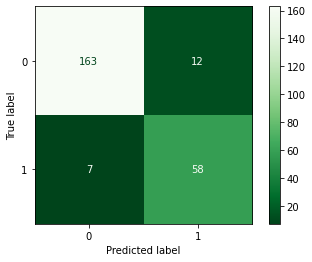

In [80]:
# Plotting confusion matrix
plot_confusion_matrix(forest_model, X_test_final, y_test, colorbar=True, cmap='Greens_r') 

Pada matriks ini terlihat label 1 (tidak produktif) yang diprediksi dengan benar sejumlah 58 (true positif) dan yang salah prediksi sejumlah 7 (false positif). Untuk label 0 (produktif) yang dapat diprediksi dengan benar sejumlah 163 (true negatif) dan salah prediksi sejumlah 12 (false negatif). Sebenarnya model dengan parameter default ini sudah cukup baik dalam mengklasifikasikan keduanya namun untuk memaksimalkan performanya, mari kita coba tuning hyperparameter pada model kita.

### Hyperparameter Tunning

Hyperparameter tuning menggunakan metode GridSearchCV untuk membantu menentukan hyperparameter yang paling optimal dengan asumsi dapat meningkatkan performa model.

In [64]:
param_grid_fr = { 
    'n_estimators': [200, 300, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [3,4,5,6,7],
    'criterion' :['gini', 'entropy']
}

In [65]:
RFModel_grid = GridSearchCV(estimator=forest_model, param_grid=param_grid_fr, verbose=1, cv=5, n_jobs=-1)
RFModel_grid.fit(X_train_smnc,y_train_smnc)
print(RFModel_grid.best_estimator_)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
RandomForestClassifier(max_depth=7, max_features='auto', n_estimators=300,
                       random_state=49)


Didapati hyperparameter yang terbaik adalah max_depth = 7, max_feature = 'auto', n_estimator = 300, dan random_state = 49.
Kemudian mari kita aplikasikan hyperparameter tersebut pada model kita 

In [66]:
rftun_y_pred_train = RFModel_grid.predict(X_train_smnc)
rftun_y_pred_test = RFModel_grid.predict(X_test_final)

rftun_y_proba_train = RFModel_grid.predict_proba(X_train_smnc)
rftun_y_proba_test = RFModel_grid.predict_proba(X_test_final)

In [67]:
# Evaluating KNN model
print("Training")
print(classification_report(y_train_smnc,rftun_y_pred_train))
print("\n===========================\n")
print("Test")
print(classification_report(y_test,rftun_y_pred_test))

Training
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       700
           1       0.96      0.98      0.97       700

    accuracy                           0.97      1400
   macro avg       0.97      0.97      0.97      1400
weighted avg       0.97      0.97      0.97      1400



Test
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       175
           1       0.81      0.94      0.87        65

    accuracy                           0.93       240
   macro avg       0.89      0.93      0.91       240
weighted avg       0.93      0.93      0.93       240



Setelah dilakukan hyperparameter tuning ternyata hasilnya lebih baik. Skor dari data training juga sudah sedikit menurun dengan masuk akal. Jika kita tinjau skor recall label 1 (tidak produktif) meningkat setelah hyperparameter tuning yang awalnya 0.89 menjadi 0.94. Secara umum semua skornya bisa dibilang baik, model juga masih fit. Selanjutnya mari kita lihat visualisasi confusion matrixnya.

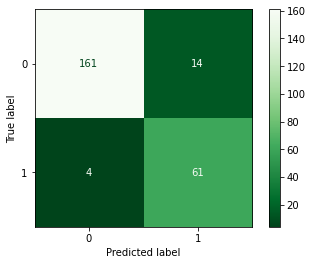

In [81]:
# Plotting confusion matrix
plot_confusion_matrix(RFModel_grid, X_test_final, y_test, colorbar=True, cmap='Greens_r') 

Jika dilihat terdapat penurunan kesalahan prediksi di label 1 (tidak produksi) yang awalnya 6 menjadi 4. Sedangkan kesalahan prediksi pada label 0 (produksi) naik dari 12 menjadi 14. Hal ini sangat wajar ketika salah satu kesalahan prediksi (false negatif) menurun pasti kesalahan prediksi label lain (false positif) akan naik. Namun secara umum model kita sudah mampu memprediksi dengan cukup baik terkait label yang kita inginkan. Selanjutnya masi kita hadapkan model yang sudah dituning dengan data inference yang sudah kita pisahkan sebelumnya.

# Pipeline

In [69]:
num_cols = ['smv','wip','over_time','idle_men','no_of_workers','actual_productivity']
cat_cols = ['department']
cat_rest = ['team']

preprocess = ColumnTransformer(
    transformers = [
        ('num',scaler,num_cols),
        ('cat_ord',encoder,cat_cols)]
)

pipe = Pipeline(steps = [('preprocess',preprocess), 
                         ('model',RandomForestClassifier(max_depth=7, max_features='auto', n_estimators=300,
                         random_state=49))])

# Model Inference

In [70]:
datainf = data_inf.reset_index(drop=True)
datainf

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,target
0,2/9/2015,Quarter2,finishing,Monday,6,0.75,2.90,0.0,960,0,0.0,0,0,8.0,0.888125,0
1,3/2/2015,Quarter1,finishing,Monday,1,0.65,3.94,0.0,3360,0,0.0,0,0,8.0,0.537919,1
2,1/26/2015,Quarter4,finishing,Monday,7,0.65,3.94,0.0,1440,0,0.0,0,0,8.0,0.646307,1
3,1/17/2015,Quarter3,sewing,Saturday,12,0.80,11.61,1039.0,5670,63,0.0,0,0,31.5,0.800247,0
4,2/12/2015,Quarter2,finishing,Thursday,9,0.80,3.94,0.0,960,0,0.0,0,0,8.0,0.656667,1


In [71]:
# Model Inference memakai pipeline
X_inf = datainf.drop(columns='target')
y_inf = datainf['target']


pipe.fit(X_inf,y_inf)

y_inf_pred = pipe.predict(datainf)

In [72]:
X_inf

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,2/9/2015,Quarter2,finishing,Monday,6,0.75,2.90,0.0,960,0,0.0,0,0,8.0,0.888125
1,3/2/2015,Quarter1,finishing,Monday,1,0.65,3.94,0.0,3360,0,0.0,0,0,8.0,0.537919
2,1/26/2015,Quarter4,finishing,Monday,7,0.65,3.94,0.0,1440,0,0.0,0,0,8.0,0.646307
3,1/17/2015,Quarter3,sewing,Saturday,12,0.80,11.61,1039.0,5670,63,0.0,0,0,31.5,0.800247
4,2/12/2015,Quarter2,finishing,Thursday,9,0.80,3.94,0.0,960,0,0.0,0,0,8.0,0.656667


In [73]:
y_inf_pred

array([0, 1, 1, 0, 1], dtype=int64)

In [74]:
y_inf_pred_df = pd.DataFrame(y_inf_pred, columns=['Prediksi RF'])

In [75]:
# Menggabungkan hasil prediksi dengan data awal
pd.concat([datainf,y_inf_pred_df], axis=1)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,target,Prediksi RF
0,2/9/2015,Quarter2,finishing,Monday,6,0.75,2.90,0.0,960,0,0.0,0,0,8.0,0.888125,0,0
1,3/2/2015,Quarter1,finishing,Monday,1,0.65,3.94,0.0,3360,0,0.0,0,0,8.0,0.537919,1,1
2,1/26/2015,Quarter4,finishing,Monday,7,0.65,3.94,0.0,1440,0,0.0,0,0,8.0,0.646307,1,1
3,1/17/2015,Quarter3,sewing,Saturday,12,0.80,11.61,1039.0,5670,63,0.0,0,0,31.5,0.800247,0,0
4,2/12/2015,Quarter2,finishing,Thursday,9,0.80,3.94,0.0,960,0,0.0,0,0,8.0,0.656667,1,1


In [76]:
pickle.dump(pipe,open('pipe.pkl','wb'))

Terlihat model kita mampu meprediksi dengan akurat terhadap data baru.

# Kesimpulan

Model terbaik telah berhasil dibuat untuk mendeteksi team yang tidak produktif. Dalam penyusunan model ini adapun langkah-langkah yang harus dilakukan antara lain:

- Exploratory Data Analysis (EDA)

Dalam EDA dilakukan visualisasi dan juga analisis terkait kolom-kolom yang tersedia. Pertama kita melihat proporsi label klasifikasi, hasilnya ditemukan bahwa proporsinya bisa dibilang moderately imbalance tetapi data masih bisa kita olah lebih lanjut. Kemudian dilakukan visualisasi data numerik untuk melihat skewness sebagai acuan melakukan outlier handling di data preprocessing. Kemudian dilakukan serangkain analisis untuk mendapatkan informasi dari dataset tersebut.

- Data Preprocessing

Dalam data preprocessing yg pertama dilakukan adalah split data inference. Kemudian split train test dan menghandle outlier di kolom train menggunakan winsorizer. Selanjutnya split target dan fitur yang dilanjutkan feature scalling dan encoding. Terdapat satu feature yang sudah berbentuk kategori ordinal sehingga tidak perlu di encoding lebih lanjut.

- Model Definition dan Training

Selanjutnya kita mendefinisikan ke tujuh model yang akan kita lakukan cross validation kemudian di training.

- Cross Validation

Setelah training kita uji cross validasinya menggunakan cross val score dengan scoring recall sesuai dengan objectives dari pembuatan model. Didapat skor recal tertinggi dengan nilai 0.96 diperoleh model Random Forest. 

- Model Evaluation

Selanjutnya kita mengevaluasi model Random Forest, didapati skor recall melampaui prediksi uji cross validation dan modelnya terbilang overfit karena skor semua metric di data train bernilai 1. 
- Hyperparameter Tuning

Kemudian kita melakukan hyperparameter tuning dengan grid search cv dengan harapan untuk mengatasi model yang over fit tersebut. 

- Evaluasi Model yg sudah di tuning

Setelah dituning model menjadi fit dengan skor keseluruhan metric yang baik pula. Sehingga secara umum model kita bisa dikatakan reliable untuk mendeteksi team mana yang masuk dalam kategori tidak produktif.

- Pipeline u/ Model Inference

Dilakukan pembuatan pipeline untuk mengolah data inference dan ternyata hasilnya sudah sesuai dengan target artniya pipeline yang dibangun sudah bisa mewakili data preprocessing serta modeling kita dengan baik. Selanjutnya pipeline inilah yang akan kita pakai untuk tujuan deployment.

